In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import callbacks

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

_________________________________________________________________________________________________________________________________________________________

In [18]:
df = pd.read_csv("mushrooms.csv")

In [19]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [21]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [22]:
le = LabelEncoder()

for columns in df.columns:
    df[columns] = le.fit_transform(df[columns])

In [23]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [24]:
X = df.drop(columns="class")
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [25]:
model = tf.keras.Sequential([keras.layers.Dense(100, activation="relu"),
                             keras.layers.Dense(50, activation="relu"),
                             keras.layers.Dense(1, activation="sigmoid")])

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics= ["accuracy"])

In [26]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001,
                                        patience = 5,
                                        restore_best_weights = True)

In [27]:
history = model.fit(X_train, y_train, 
                    validation_split=0.1,
                    epochs=20, 
                    verbose=0, 
                    callbacks=[early_stopping])

In [28]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.317642,0.865276,0.160640,0.941538
1,0.114399,0.962045,0.054620,0.993846
2,0.040233,0.990768,0.019142,0.995385
3,0.018576,0.996752,0.025875,0.993846
4,0.012122,0.997435,0.007409,1.000000
5,0.005194,1.000000,0.003553,1.000000
6,0.003240,1.000000,0.003199,1.000000
7,0.002555,1.000000,0.001720,1.000000
8,0.001621,1.000000,0.001043,1.000000
9,0.000982,1.000000,0.000731,1.000000


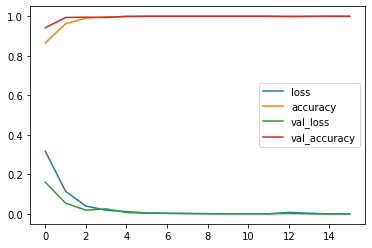

In [29]:
hist_df.plot();

In [30]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 1ms/step - loss: 8.3302e-04 - accuracy: 1.0000


[0.0008330206037499011, 1.0]

In [31]:
y_pred = model.predict(X_test)

f1_score(y_test, tf.round(y_pred))

51/51 [==============================] - 0s 777us/step


1.0